# Ödev Konusu:  Kredi Başvuru Durumu Tahmini Modeli
**Öğrenci Numarası**: Y245012006  
**Öğrenci Adı Soyadı**: Aleyna Barut  
**Ödev Amacı**:  Bu ödevin amacı bir kredi başvurusunun onaylanıp onaylanmayacağını tahmin etmek için çeşitli makine öğrenmesi algoritmalarını kullanarak bir model geliştirmektir. 
**Kullanılan Veri Kümesi**: [Kredi Başvuru Durumu Veri Seti](https://www.kaggle.com/datasets/vipin20/loan-application-data) 

                                                                    Kredi Başvuru Durumu Tahmini Modeli

ÖN İŞLEME VE KEŞİFSEL VERİ ANALİZİ İŞLEMLERİ

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Gerekli kütüphaneler eklendi.

In [53]:
# Veriyi yükleme 
#df = pd.read_csv('C:/Users/aleyn/Desktop/YapayZeka/scripts/df1_loan.csv')
# Dosyanın bulunduğu dizini belirleme
import os

file_dir = os.path.join(os.getcwd())
# Dosya yolunu oluşturma
file_path = os.path.join(file_dir, 'df1_loan.csv')
# CSV dosyasını okuma
df = pd.read_csv(file_path)


Bu satırda belirtilen dosya yolundaki CSV dosyası okunarak veriler bir DataFrame olarak df değişkenine aktarılır.

In [54]:
print(df.shape)
df.head()

(500, 15)


,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


df.shape, veri setinin satır ve sütun sayısını gösterir. head() metodu çağrılarak veri çerçevesinin ilk 5 satırı görüntülenir. Bu işlem veri setindeki sütun adlarını ve ilk birkaç değeri kontrol ederek veri yapısını anlamayı sağlar.

In [55]:
#Veri tiplerini gösterir.
df.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

df.dtypes, veri setindeki her bir sütunun veri tiplerini gösterir.

In [56]:
# Gereksiz olan kısımları kaldırdık
df.drop(['Unnamed: 0', 'Loan_ID'], axis = 1, inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0



Bu kod, veri setinden "Unnamed: 0" ve "Loan_ID" adlı sütunları kaldırır ve değişiklikleri veri setine uygular. axis=1 parametresi, sütunları hedef alır. inplace=True ise işlemin veri setinde kalıcı olarak yapılmasını sağlar.

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


df.describe() komutu, veri setindeki sayısal sütunlar için temel istatistiksel özet bilgileri yazdırır.

In [7]:
df.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

Bu kod veri kümesindeki her bir sütun için eksik (null) değerlerin toplam sayısını döndürür.

In [8]:
nan_features = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

for feature in nan_features:
    print('{}: {}% values missing'.format(feature, (df[feature].isnull().sum() / len(df)) * 100))

Gender: 1.7999999999999998% values missing
Married: 0.6% values missing
Dependents: 2.4% values missing
Self_Employed: 5.4% values missing
LoanAmount: 3.5999999999999996% values missing
Loan_Amount_Term: 2.8000000000000003% values missing
Credit_History: 8.200000000000001% values missing


Veri setindeki eksik (NaN) değerlerin hangi sütunlarda bulunduğunu ve bu sütunlarda ne kadar eksik veri olduğunu yüzde olarak ekrana yazdırır.

In [9]:
target = 'Loan_Status'

Target özellik seçilir.

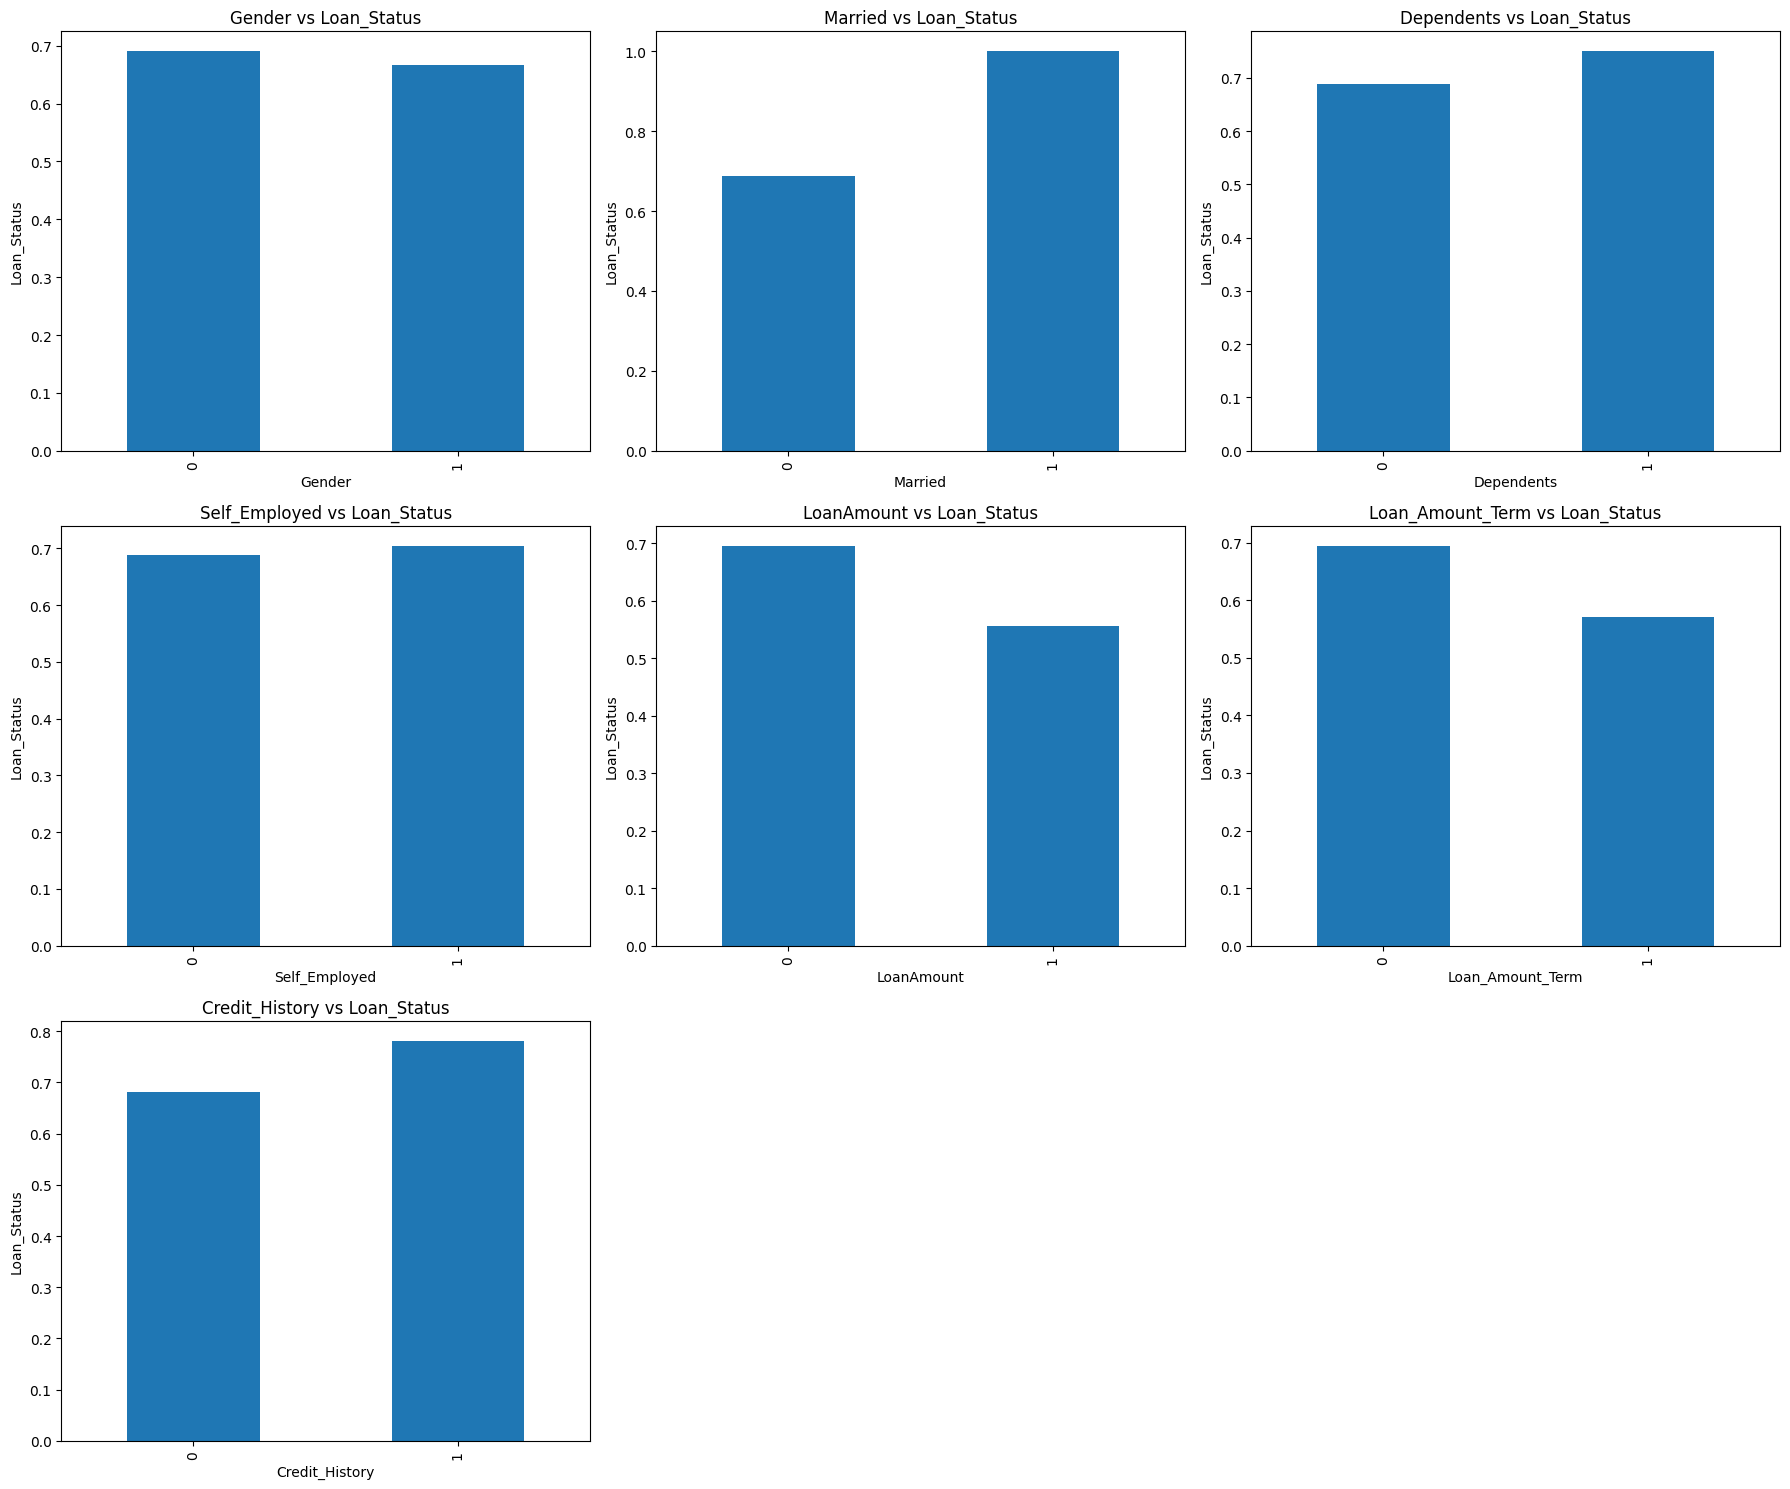

In [10]:
# Subplots oluşturma
n_features = len(nan_features)
n_cols = 3  # 3 sütunlu grafikler
n_rows = (n_features + n_cols - 1) // n_cols  # Satır sayısını hesapla

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # eksenleri tek bir liste haline getir

# Grafiklerin çizilmesi
for i, feature in enumerate(nan_features):
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)  # NaN olanlar için 1, diğerleri için 0
    data[target] = np.where(data[target] == 'Y', 1, 0)  # Hedefi 1 (evet) ve 0 (hayır) olarak dönüştür

    ax = axes[i]  # Her grafiği uygun eksene yerleştir
    data.groupby(feature)[target].mean().plot.bar(ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{feature} vs {target}')

# Fazla eksenleri gizleme
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Eksik değerlerin(NaN) hangi özelliklerde bulunduğunu ve bu eksik değerlerin hedef değişken (Loan_Status) ile olan ilişkisini bar grafiklerde görsel bir şekilde analiz edilmesini sağlar

In [11]:
nan_numeric = []
nan_categoric = []

for feature in nan_features:
    if df[feature].dtype != 'O':
        nan_numeric.append(feature)
    else:
        nan_categoric.append(feature)
        
print('Numeric missing:', nan_numeric)
print('Categorical missing:', nan_categoric)


Numeric missing: ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical missing: ['Gender', 'Married', 'Dependents', 'Self_Employed']


Sayısal ve kategorik verilerde eksik (NaN) değerler bulunan özellikleri sırasıyla yazdırır.

In [ ]:
# Sayısal eksik verileri doldurmak için medyan 
for feature in nan_numeric:
    median_value = df[feature].median()  # Sayısal veri için medyan değeri hesapla
    df[feature].fillna(median_value, inplace=True)  # Eksik değerleri medyan ile doldur

# Kategorik eksik verileri doldurmak için mod 
for feature in nan_categoric:
    mode_value = df[feature].mode()[0]  # Kategorik veri için mod değeri hesapla
    df[feature].fillna(mode_value, inplace=True)  # Eksik değerleri mod ile doldur



Sayısal eksik veriler medyan değeriyle kategorik eksik veriler ise mod değeriyle doldurulur.

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

Eksik değerlerin doldurulmasından sonra eksik değer hala var mı diye tekrar kontrol edilir.

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5493.644000,1506.307840,143.390000,343.032000,0.856000
std,6515.668972,2134.432188,80.912091,62.999117,0.351441
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,160.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


Doldurulmadan sonra veri setindeki sayısal sütunlar için temel istatistiksel özet bilgileri yazdırır.

In [15]:
df['Total_Income'] = df['Total_Income'].replace({'\$': '', ',': ''}, regex=True).astype(float)

Dolar işareti ve virgül karakterleri kaldırılır ve sayılar float türünde tutulur. Veri daha sonra matematiksel işlemler veya analizler için uygun hale getirilir.

In [16]:
# Sayısal özellikleri seçme
num_features = df.select_dtypes(include=['number']).columns.tolist()

# Kategorik özellikleri seçme
cat_features = df.select_dtypes(exclude=['number']).columns.tolist()

print("Sayısal Özellikler:", num_features)
print("Kategorik Özellikler:", cat_features)


Sayısal Özellikler: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']
Kategorik Özellikler: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Sayısal ve kategorik özellikler seçilir.

In [17]:
# IQR (Interquartile Range) ile aykırı değerlerin tespiti
Q1 = df['Total_Income'].quantile(0.25)
Q3 = df['Total_Income'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleme
df_filtered = df[(df['Total_Income'] >= lower_bound) & (df['Total_Income'] <= upper_bound)]


IQR (Interquartile Range) kullanarak Total_Income sütunundaki aykırı değerleri (outliers) tespit edip filtrelenir.

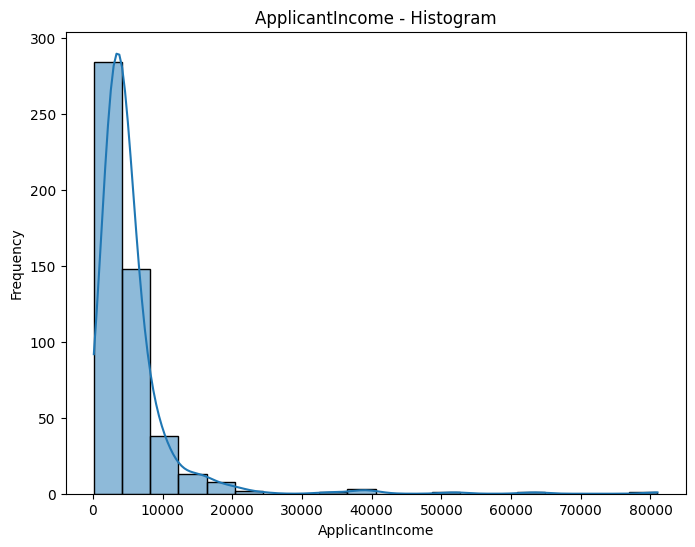

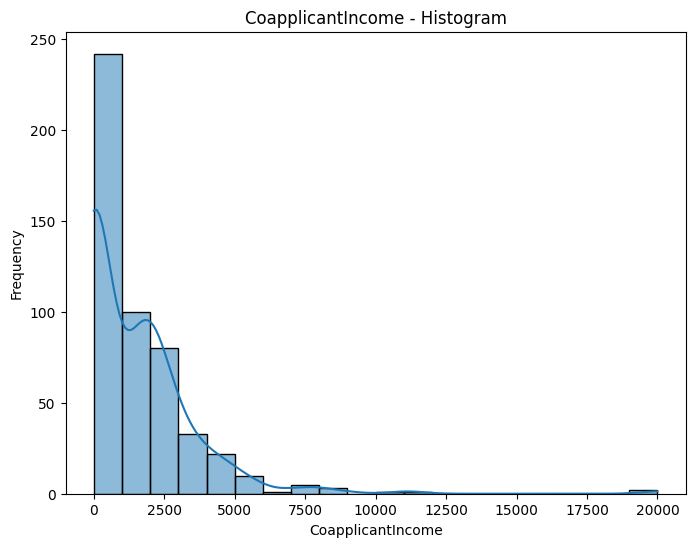

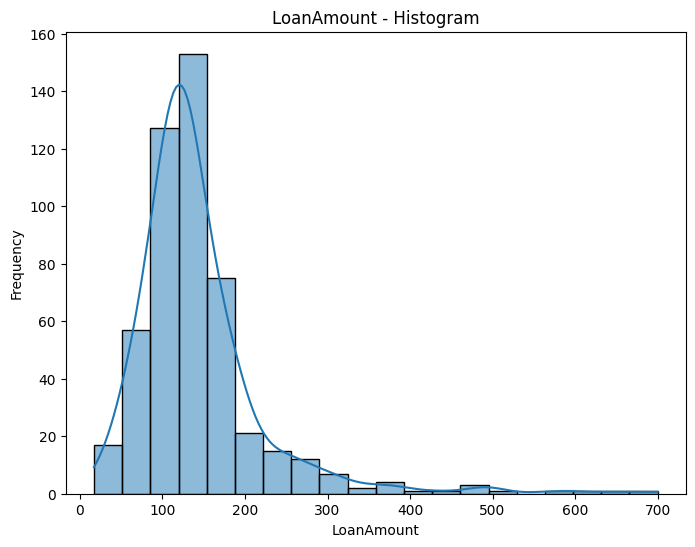

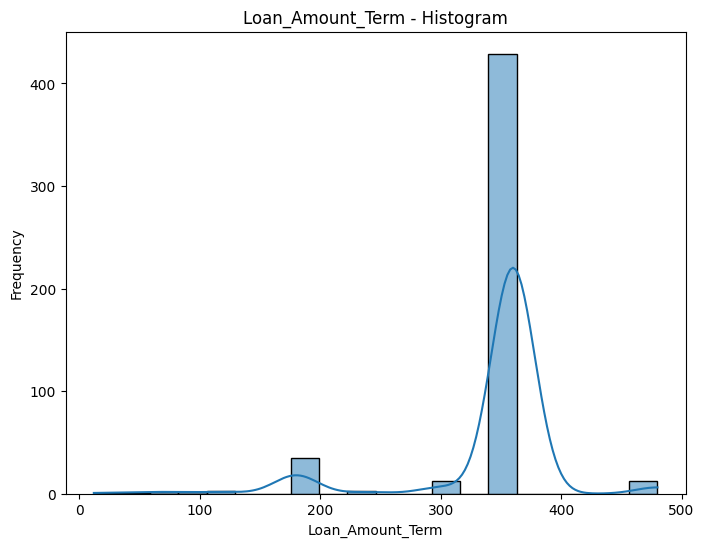

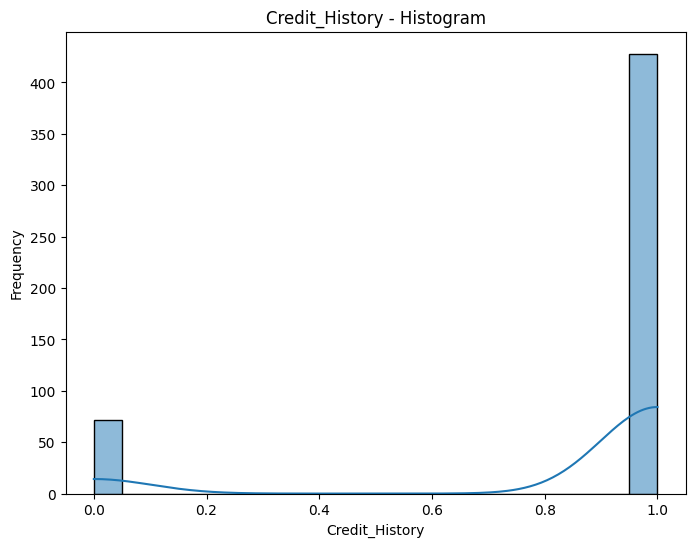

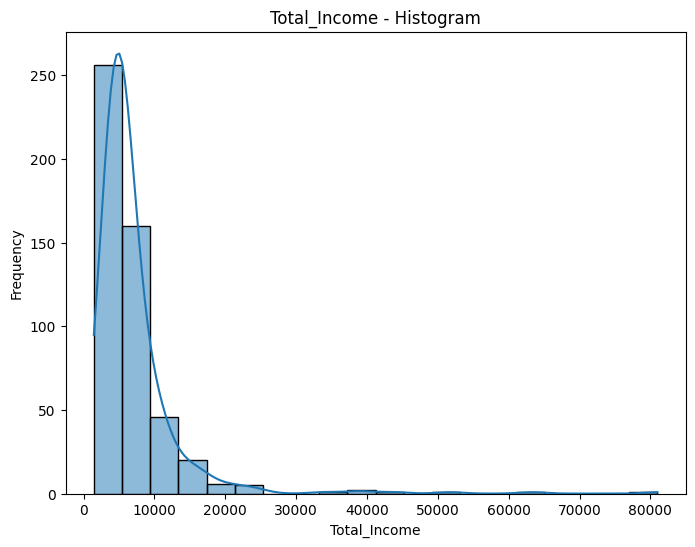

In [18]:
# Sayısal özelliklerin grafiklerini çizme
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} - Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Sayısal özellikler görselleştirilir.

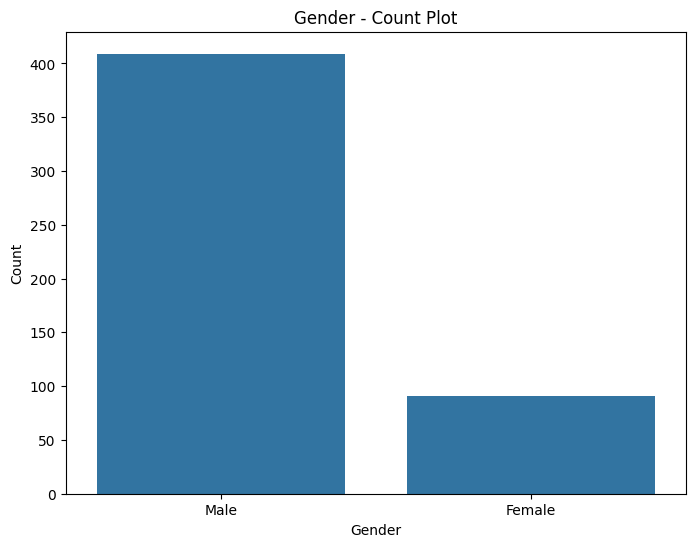

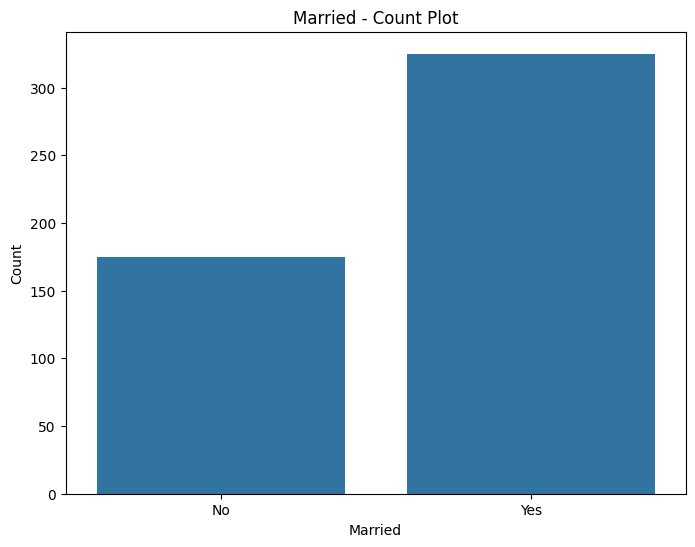

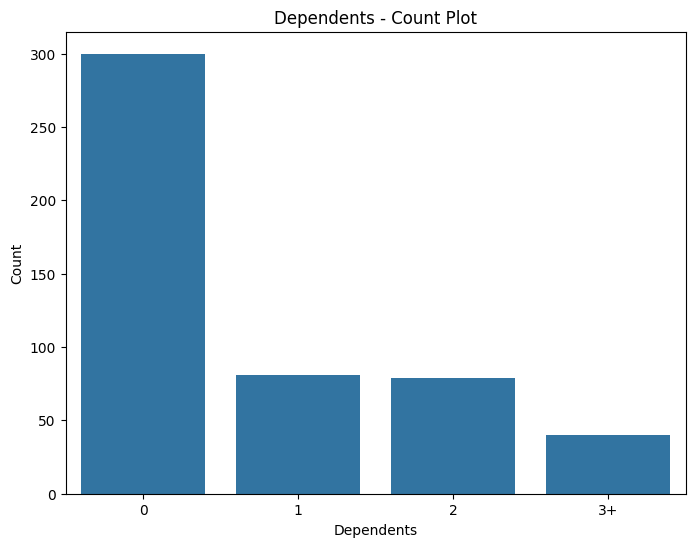

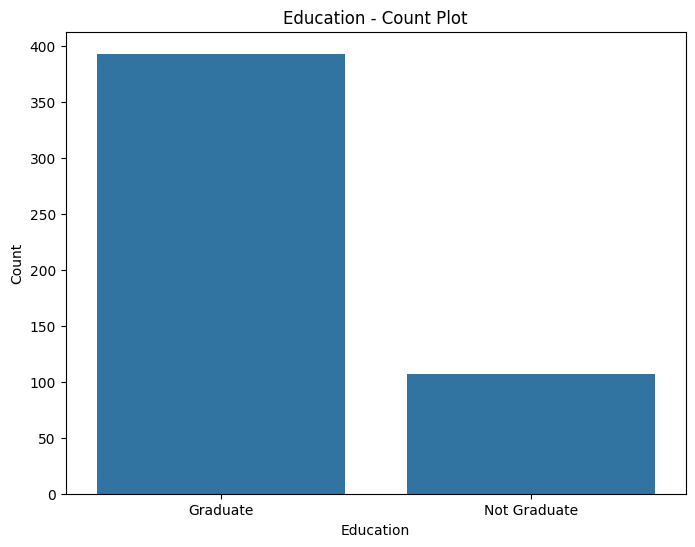

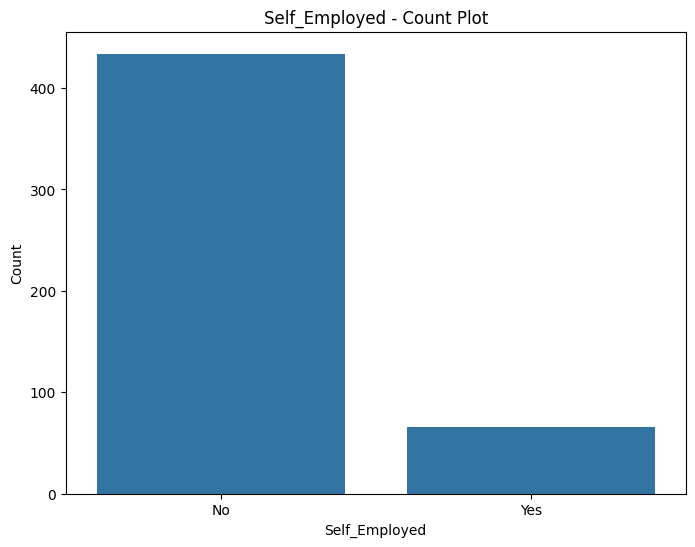

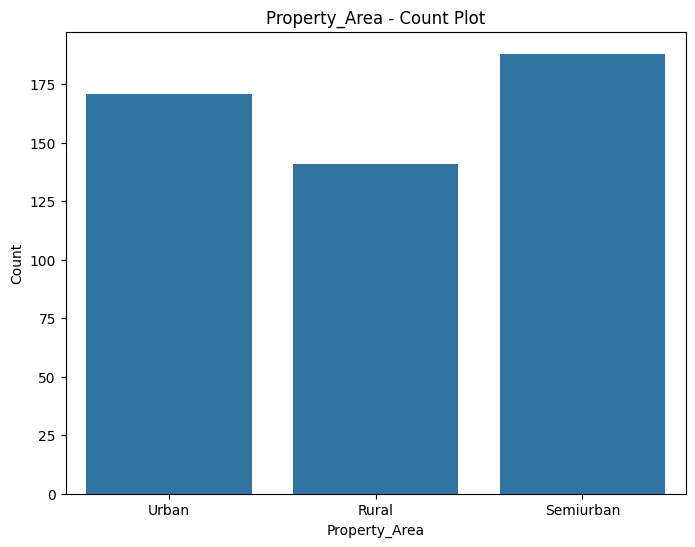

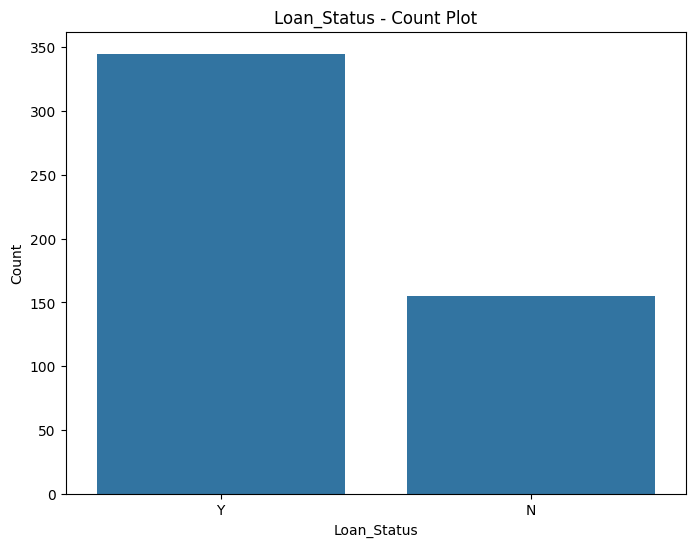

In [19]:
# Kategorik özelliklerin grafiklerini çizme
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[feature])
    plt.title(f'{feature} - Count Plot')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Kategorik özellikler görselleştirilir.

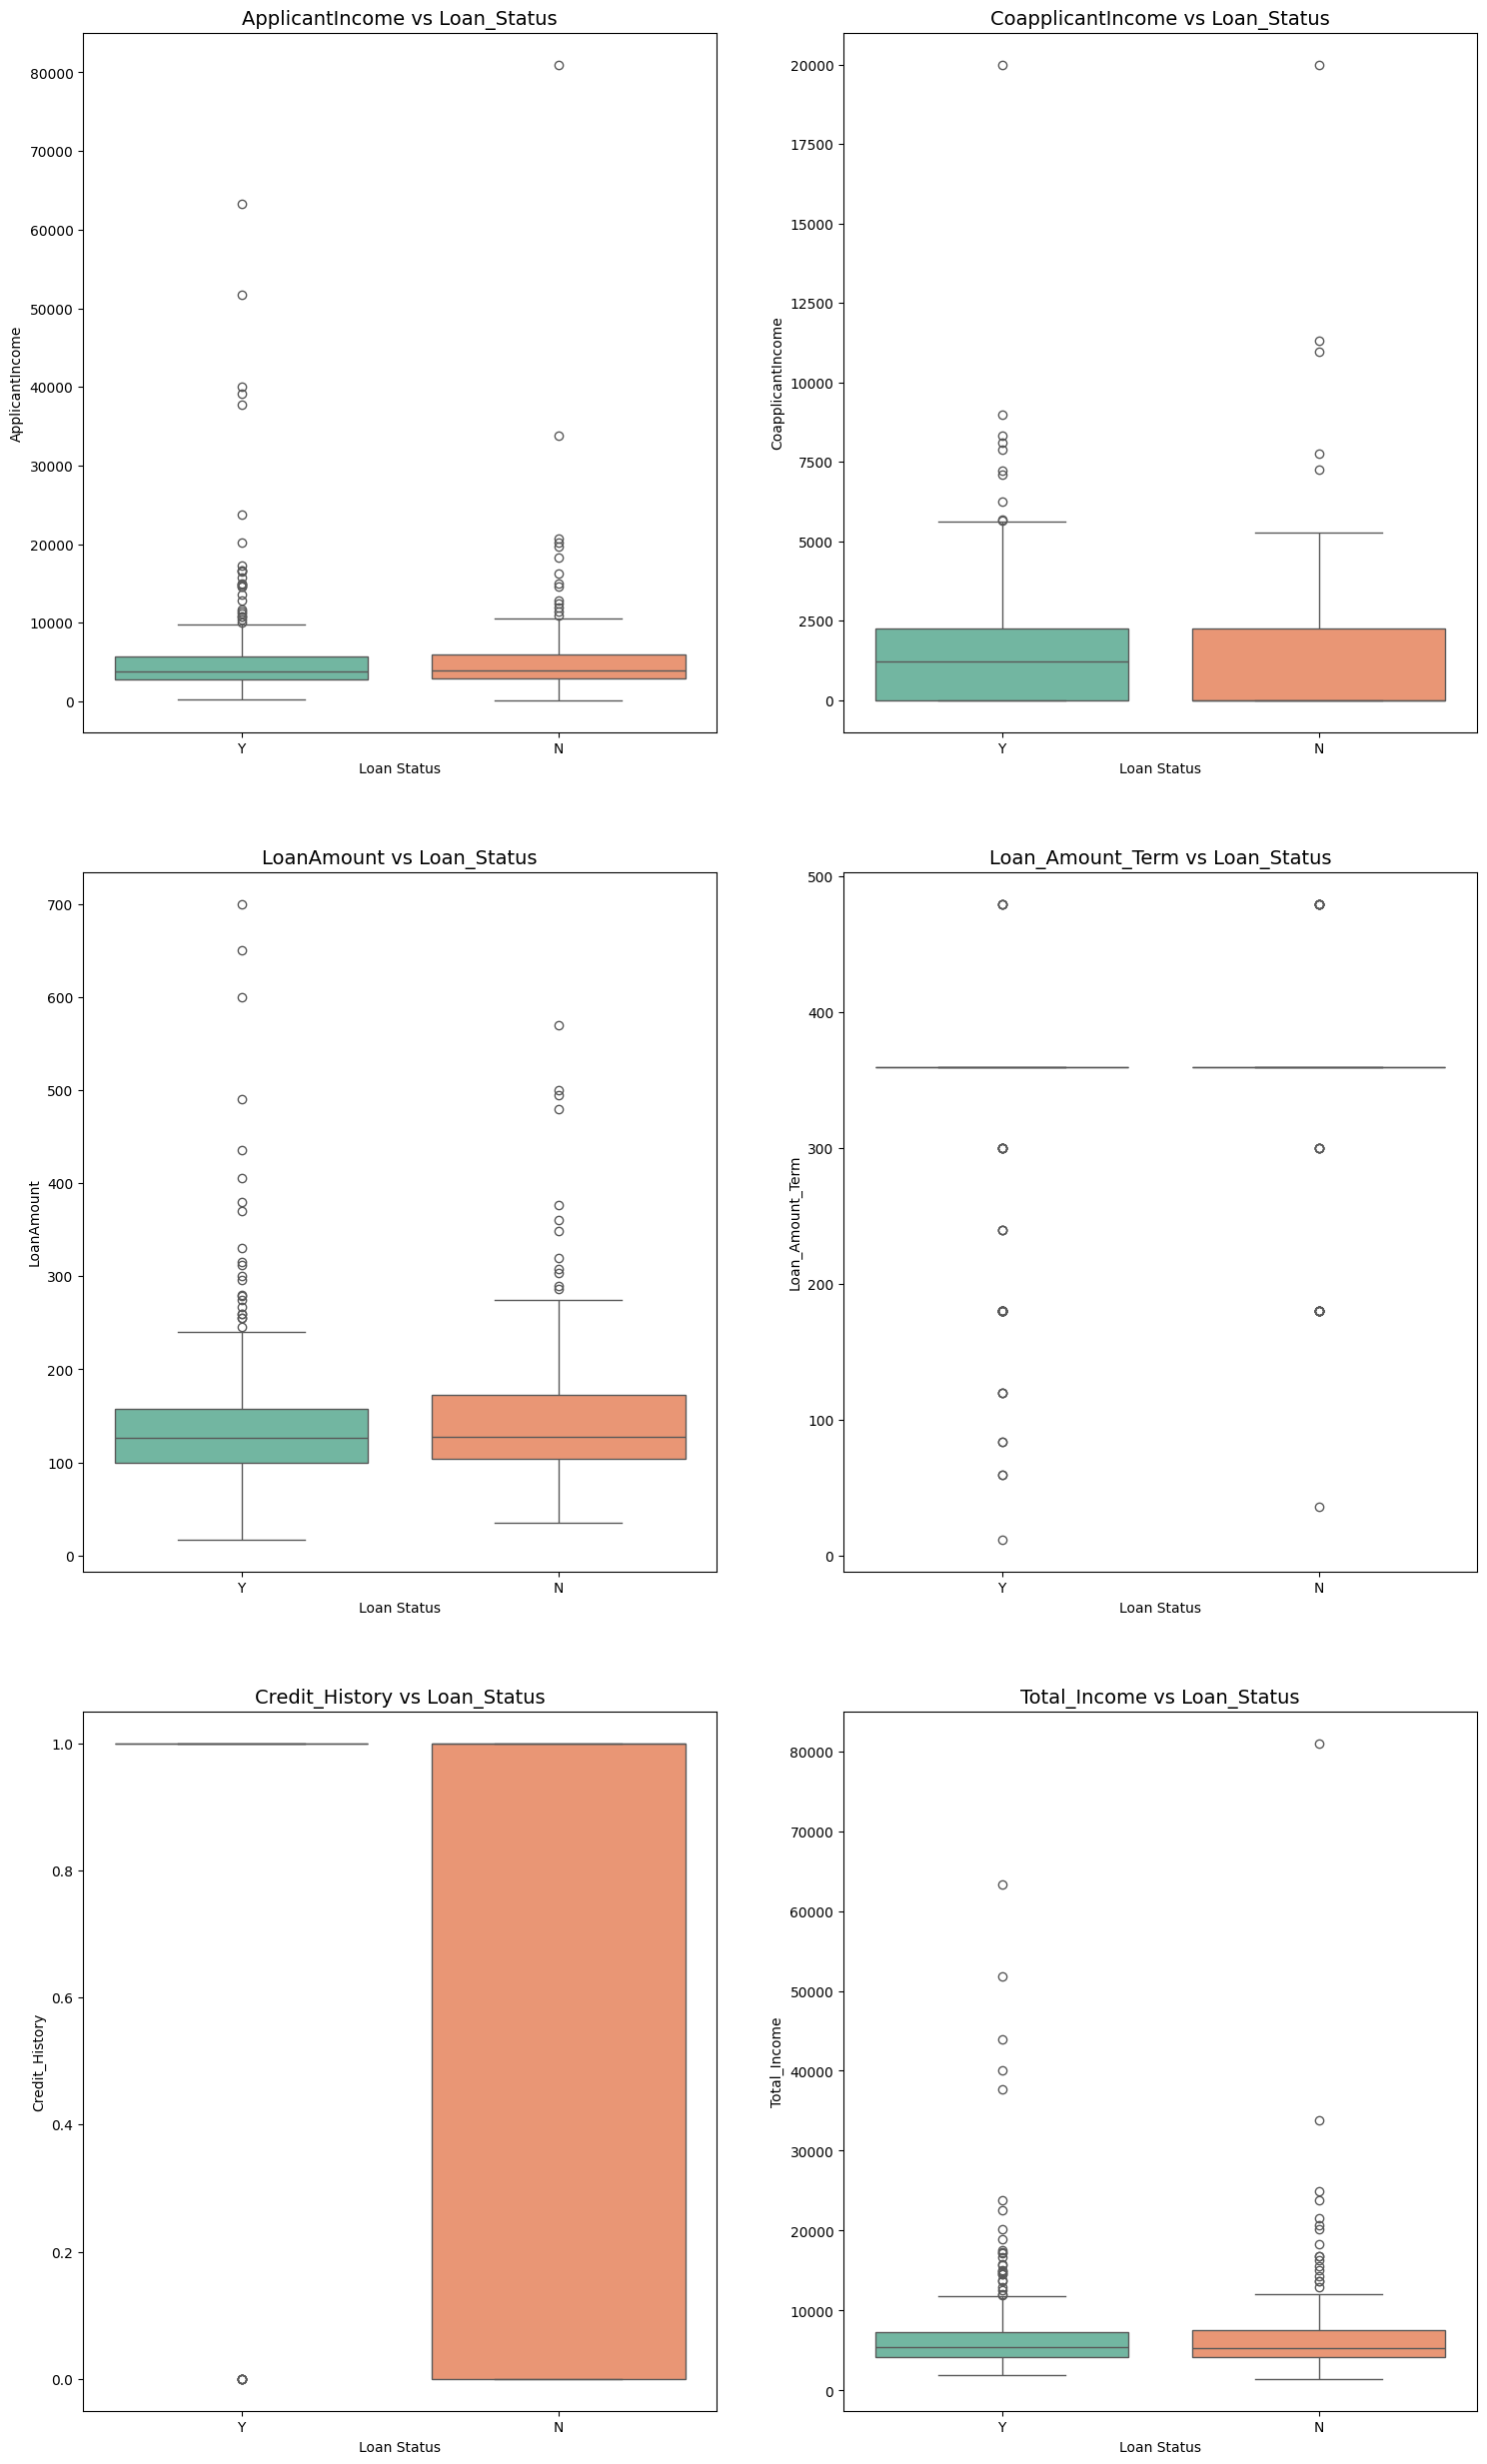

In [20]:
# Subplots için satır ve sütun sayısını ayarlama
n_rows, n_cols = 3, 2  # 3 satır, 2 sütun

# Grafik boyutunu ayarlama
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 20))

# Her sayısal özellik için grafik çizme
for i, num_col in enumerate(num_features):
    row, col = i // n_cols, i % n_cols
    
    # Boxplot çizimi (Loan_Status'a göre)
    sns.boxplot(x='Loan_Status', y=num_col, data=df, ax=ax[row, col], palette="Set2")
    
    ax[row, col].set_title(f'{num_col} vs Loan_Status', fontsize=14)
    ax[row, col].set_ylabel(num_col, fontsize="medium")
    ax[row, col].set_xlabel('Loan Status', fontsize="medium")

# Grafiklerin düzenini optimize etme
fig.subplots_adjust(top=1.3)

# Grafiklerin gösterilmesi
plt.show()

Her sayısal özellik içi, Loan_Status kategorilerine göre bir boxplot grafiği çizilir. Bu grafikler, sayısal özelliklerin Loan_Status (onaylanan veya reddedilen krediler) ile nasıl dağıldığını görselleştirmek için kullanılır. 

In [21]:
# Kategorik Değişkenler için Dönüşümler
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

# Dependents: Sayısal bir değer olarak kabul edebiliriz ancak '+' işaretini de temizlemeliyiz.
df['Dependents'] = df['Dependents'].replace({'3+': 3})
df['Dependents'] = df['Dependents'].astype(int)

# Loan_Status: Hedef değişkeni 1 ve 0'a dönüştürelim.
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


Veri setindeki kategorik değişkenler sayısal verilere dönüştürülür.

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,126.5,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


Dönüştürme işleminde sonra dataset tekrar kontrol edilir.

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

Dönüştürme işleminden sonra eksik değerler tekrar kontrol edilir.

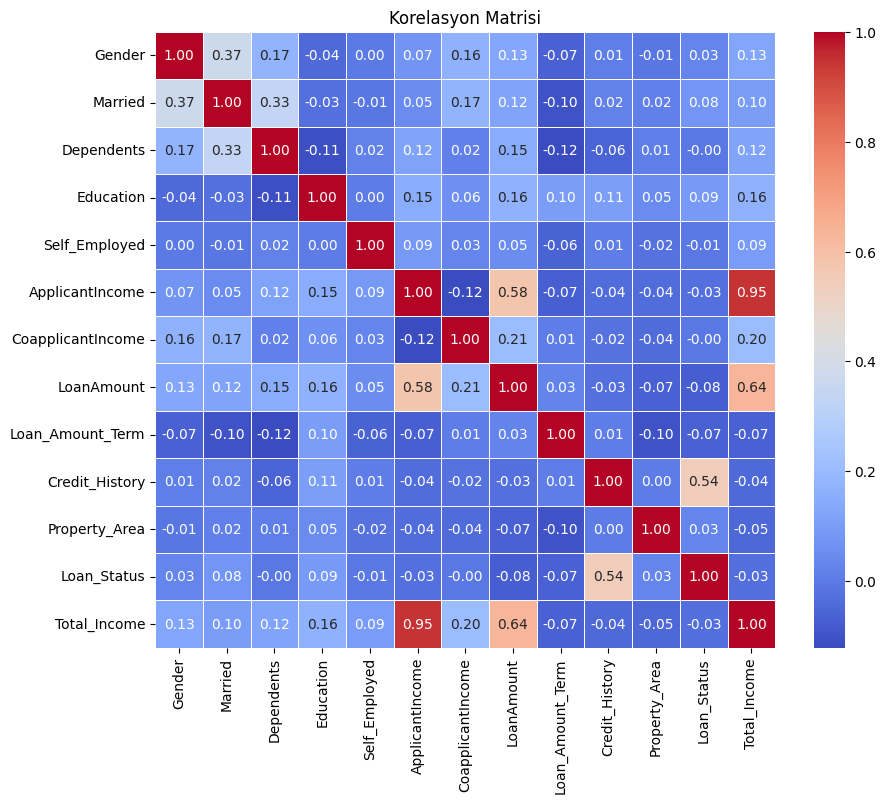

In [24]:
# Korelasyon matrisini hesapla
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


Değişkenler arasındaki korelasyona bakılır.

MODEL GELİŞTİRME

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Sayısal verileri standartlaştırma
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Özellikler ve hedef değişken
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Eğitim ve test verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Sayısal verilerin standartlaştırılır, özellikler ve hedef değişken ayrılır ve verinin eğitim ve test setlerine bölünür.

Ensemble Model Doğruluk Skoru: 0.84000

Sınıflandırma Raporu:

              precision    recall  f1-score  support
0              0.941176  0.516129  0.666667    31.00
1              0.819277  0.985507  0.894737    69.00
accuracy       0.840000  0.840000  0.840000     0.84
macro avg      0.880227  0.750818  0.780702   100.00
weighted avg   0.857066  0.840000  0.824035   100.00


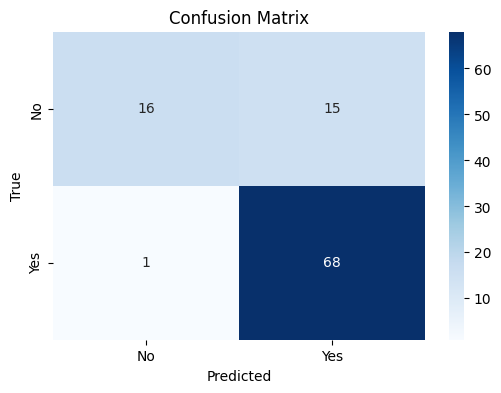

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Demografik Veri Analizi (Karar Ağacı)
# Demografik veriler için özellikler seçilir.
demographic_features = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed']
X_demographic_train = X_train[demographic_features]
X_demographic_test = X_test[demographic_features]

# Karar Ağacı için Parametre Optimizasyonu
# GridSearchCV kullanarak karar ağacının parametreleri optimize edilir.
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# GridSearchCV ile karar ağacı modeli eğitim verileri üzerinde optimize edilir.
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=3)
dt_grid_search.fit(X_demographic_train, y_train)
dt_model = dt_grid_search.best_estimator_
dt_predictions = dt_model.predict(X_demographic_test)

# 2. Finansal Veri Analizi (Random Forest ve Lojistik Regresyon)
# Finansal veriler için özellikler seçilir.
financial_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X_financial_train = X_train[financial_features]
X_financial_test = X_test[financial_features]

# Random Forest için Parametre Optimizasyonu
#GridSearchCV kullanarak random forest modelinin parametreleri optimize edilir.
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3)
rf_grid_search.fit(X_financial_train, y_train)
# En iyi model alınır.
rf_model = rf_grid_search.best_estimator_
rf_predictions = rf_model.predict(X_financial_test)

# Lojistik Regresyon için Parametre Optimizasyonu
# GridSearchCV kullanarak lojistik regresyon modeli optimize edilir.
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
logistic_grid_search = GridSearchCV(LogisticRegression(random_state=42), logistic_param_grid, cv=3)
logistic_grid_search.fit(X_financial_train, y_train)
# En iyi model alınır.
logistic_model = logistic_grid_search.best_estimator_
lr_predictions = logistic_model.predict(X_financial_test)

# 3. Kredi Geçmişi Analizi (SVM)
# Kredi geçmişi verileri için özellikler seçilir.
credit_features = ['Credit_History', 'Property_Area']
X_credit_train = X_train[credit_features]
X_credit_test = X_test[credit_features]

# SVM için Parametre Optimizasyonu
# GridSearchCV kullanarak SVM modelinin parametreleri optimize edilir.
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid_search = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=3)
svm_grid_search.fit(X_credit_train, y_train)
# En iyi model alınır.
svm_model = svm_grid_search.best_estimator_
svm_predictions = svm_model.predict(X_credit_test)

# 4. Gradient Boosting Model
# Gradient Boosting için Parametre Optimizasyonu
# GridSearchCV kullanarak gradient boosting modelinin parametreleri optimize edilir.
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3)
gb_grid_search.fit(X_financial_train, y_train)
# En iyi model alınır.
gb_model = gb_grid_search.best_estimator_
gb_predictions = gb_model.predict(X_financial_test)

# 5. AdaBoost Modeli
# AdaBoost için Parametre Optimizasyonu
# GridSearchCV kullanarak AdaBoost modelinin parametreleri optimize edilir.
adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
adaboost_grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_financial_train, y_train)
# En iyi model alınır.
adaboost_model = adaboost_grid_search.best_estimator_
adaboost_predictions = adaboost_model.predict(X_financial_test)

# 6. Ensemble (Voting Classifier)
# Modelleri VotingClassifier ile birleştiriyoruz
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svm', svm_model),
    ('dt', dt_model),
    ('lr', logistic_model),
    ('adaboost', adaboost_model)
], voting='soft')

# Eğitim
ensemble_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
ensemble_predictions = ensemble_model.predict(X_test)

# Modelin doğruluğu (accuracy)
accuracy = accuracy_score(y_test, ensemble_predictions)
# Performans raporunu yazdırma
report = classification_report(y_test, ensemble_predictions, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()

print(f"Ensemble Model Doğruluk Skoru: {accuracy:.5f}\n")
print("Sınıflandırma Raporu:\n")
print(report_df)

# Karışıklık Matrisi
# Gerçek ve tahmin edilen değerlerin karşılaştırması karışıklık matrisi ile görselleştirilir.
conf_matrix = confusion_matrix(y_test, ensemble_predictions)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Bu kodda kredi başvurusu yapan bireylerin kredi onaylarını tahmin etmek için çeşitli sınıflandırma modelleri kullanarak veri analizi yapılır. İlk olarak demografik, finansal ve kredi geçmişi verilerine dayalı olarak karar ağacı, random forest, lojistik regresyon, SVM, gradient boosting ve AdaBoost modelleri oluşturulur ve her model için parametre optimizasyonu GridSearchCV ile yapılır. Ardından bu modellerin sonuçları birleştirilerek bir ensemble model (soft voting classifier) oluşturulur ve test verisi üzerinde tahminler yapılır. Sonuçlar doğruluk skoru, sınıflandırma raporu ve karışıklık matrisi ile değerlendirilir böylece modelin performansı görsel ve sayısal olarak analiz edilir.